This notebook tests the python btrack module.

In [1]:
from midap.tracking.bayesian_tracking import BayesianCellTracking

import glob
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.measure import regionprops
from scipy.spatial import distance
import pandas as pd
import os

### Load segmentations

In [2]:
# Load data
path = '../example_data/Pos58/TXRED'
images_folder = os.path.join(path, 'cut_im')
segmentation_folder = os.path.join(path, 'seg_im')

# glob all the cut images and segmented images
img_names_sort = np.sort(glob.glob(os.path.join(images_folder, '*frame*.png')))
seg_names_sort = np.sort(glob.glob(os.path.join(segmentation_folder, '*frame*.png')))

# Parameters:
crop_size = (128, 128)
target_size = (512, 512)
input_size = crop_size + (4,)
num_time_steps = len(img_names_sort)

### Run the tracking

In [3]:
tracker_obj = BayesianCellTracking(imgs=img_names_sort, segs=seg_names_sort, target_size=target_size)
tracker_obj.run_model()

[INFO][2022/12/15 10:50:58 AM] Localizing objects from segmentation...
[INFO][2022/12/15 10:50:58 AM] Found intensity_image data
[INFO][2022/12/15 10:50:58 AM] Calculating weighted centroids using intensity_image
[INFO][2022/12/15 10:50:58 AM] Objects are of type: <class 'dict'>
[INFO][2022/12/15 10:50:58 AM] ...Found 613 objects in 9 frames.
[INFO][2022/12/15 10:50:58 AM] Loaded btrack: /Users/franziskaoschmann/miniconda3/envs/midap/lib/python3.8/site-packages/btrack/libs/libtracker.dylib
[INFO][2022/12/15 10:50:58 AM] btrack (v0.4.6) library imported
[INFO][2022/12/15 10:50:58 AM] Starting BayesianTracker session
[INFO][2022/12/15 10:50:58 AM] Setting update_method -> BayesianUpdates.EXACT
[INFO][2022/12/15 10:50:58 AM] Loading configuration file: /Users/franziskaoschmann/Library/Caches/btrack-examples/examples/cell_config.json
[INFO][2022/12/15 10:50:58 AM] Objects are of type: <class 'list'>
[INFO][2022/12/15 10:50:58 AM] Starting tracking... 
[INFO][2022/12/15 10:50:58 AM] Trackin

GLPK Integer Optimizer 5.0
376 rows, 291 columns, 396 non-zeros
291 integer variables, all of which are binary
Preprocessing...
188 rows, 291 columns, 396 non-zeros
291 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 188
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
188 rows, 291 columns, 396 non-zeros
*     0: obj =   1.383541904e+02 inf =   0.000e+00 (17)
*    16: obj =   8.563680382e+01 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Integer optimization begins...
Long-step dual simplex will be used
+    16: mip =     not found yet >=              -inf        (1; 0)
+    16: >>>>>   8.563680382e+01 >=   8.563680382e+01   0.0% (1; 0)
+    16: mip =   8.563680382e+01 >=     tree is empty   0.0% (0; 1)
INTEGER OPTIMAL SOLUTION FOUND


### Visualizing the tracking

In [12]:
tracker_obj.convert_data()
tracker_obj.generate_label_stack()
tracker_obj.correct_label_stack()
label_stack = tracker_obj.label_stack
label_stack_correct = tracker_obj.label_stack_correct

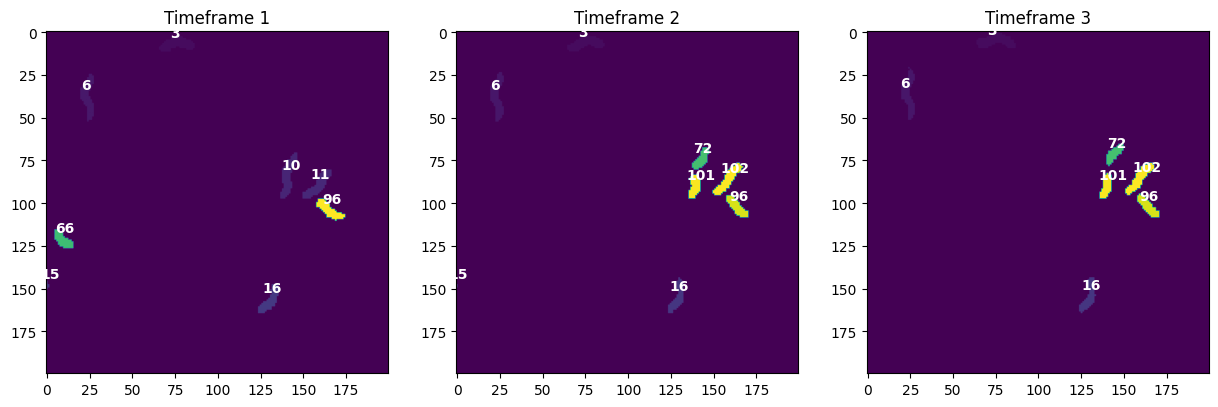

In [14]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1,3,1)
img = label_stack[1][:200,200:400]
plt.imshow(img)
plt.title('Timeframe ' + str(1))
reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')

ax = plt.subplot(1,3,2)
img = label_stack[2][:200,200:400]
plt.imshow(img)
plt.title('Timeframe ' + str(2))
reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')

ax = plt.subplot(1,3,3)
img = label_stack[3][:200,200:400]
plt.imshow(img)
plt.title('Timeframe ' + str(3))
reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')

In [17]:
filter1 = tracker_obj.track_output_correct['frame'] == 1
filter2 = tracker_obj.track_output_correct['trackID'] == 10
np.where(filter1&filter2)

(array([116]),)

In [18]:
tracker_obj.track_output_correct.loc[filter1&filter2]

,frame,trackID,x,y,area,intensity_mean,intensity_min,intensity_max,minor_axis_length,major_axis_length,trackID_d1,trackID_d2,trackID_mother
1,1,10,341.213134,83.890422,135.0,0.248164,0.132727,0.362325,6.834143,29.645529,72,101,10
